# Описание проекта

# Проект представляет собой массив клиентов банка. Необходимо исследовать портреты уходящих и постоянных клиентов.

# Шаг 1. Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import json
from scipy import stats as st
import math as mth
!pip install -U pandas

#import sys
#!"{sys.executable}" -m pip install phik

     ---------------------------------------- 10.7/10.7 MB 5.2 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


In [2]:
# Откроем таблицу
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
data = pd.read_csv(path)
data.head(5)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [83]:
# Общая информация о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Вывод: в результате загрузки данных были получены общие данные о таблице

# Шаг 2. Предобработка данных

## Приведение к нижнему регистру

In [84]:
# Приведём названия столбцов к нижнему регистру
data.columns = map(str.lower, data.columns)
data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


## Изменение типов данных

Посмотрим, нужно ли менять типы данных в столбцах. В представленной выше таблице, и по данным, которые там хранятся, можно сделать вывод, что типы соответствуют данным в каждом столбце, следовательно, изменения типов будут излишними.

## Работа с пропусками

### Замена пропусков в столбце "age"

In [85]:
# Найдём количество пропусков в столбце "age"
print('Пропусков в столбце "age":', len(data[data['age'].isna()]))

Пропусков в столбце "age": 26


В столбце "age" 26 значений, где не указан возраст, что составляет 0,26% от всех записей этого столбца

In [86]:
# Посмотрим какой диапазон возраста представлен в таблице
print('Максимальный возраст клиента:', data['age'].max())
print('Минимальный возраст клиента:', data['age'].min())

Максимальный возраст клиента: 86.0
Минимальный возраст клиента: 18.0


<AxesSubplot:>

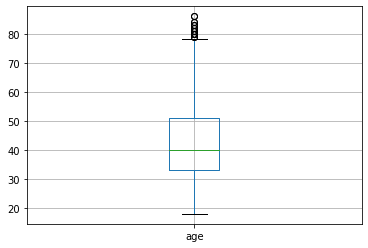

In [87]:
data.boxplot('age')

Видно, что есть редкие значения, люди почтенного возраста, поэтому пропуски значений в столбце "age" заполним медианным значением.

In [88]:
# Найдём медиану возраста
data['age'].median()

40.0

In [89]:
# Заменим пропуски в столбце "age"
data['age'] = data['age'].fillna(data['age'].median())

### Замена пропусков в столбце "balance"

In [90]:
# Найдём количество пропусков в столбце "balance"
print('Пропусков в столбце "balance":', len(data[data['balance'].isna()]))

Пропусков в столбце "balance": 2295


В столбце "age" 2295 значений, где не указан размер баланса, что составляет 22,95% от всех записей этого столбца

In [91]:
# Посмотрим какой диапазон баланса представлен в таблице
print('Максимальное значение баланса:', data['balance'].max())
print('Минимальное значение баланса:', data['balance'].min())

Максимальное значение баланса: 119113552.01
Минимальное значение баланса: 0.0


<AxesSubplot:>

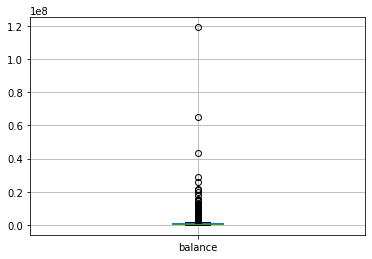

In [92]:
data.boxplot('balance')

Видно, что есть редкие значения, самое высокое из которых более 100 миллионов, что не похоже на правду. Удалим выбивающиеся значение. Пусть выбивающиеся значения те, что находятся выше 95 квантиля.

### Начало анализа пропусков в balance

In [93]:
data['+/-'] = np.where(np.isnan(data['balance']), '1', '0')

In [94]:
# Посчитаем данные о ср. возрасте
new_1 = data.pivot_table(index=['+/-'], values=['age'], aggfunc=['mean']).reset_index()
new_1.columns = ['отток', 'ср. возраст']
new_1.drop('отток', axis=1, inplace=True)
s = new_1.T
s.columns = ['Не пропущено', 'Пропущено']
s.reset_index(inplace= True)

In [95]:
# Посчитаем данные о ср. зарплате
new_2 = data.pivot_table(index=['+/-'], values=['est_salary'], aggfunc=['mean']).reset_index()
new_2.columns = ['отток', 'ср. зарплата']
new_2.drop('отток', axis=1, inplace=True)
sq = new_2.T
sq.columns = ['Не пропущено', 'Пропущено']
sq.reset_index(inplace= True)

In [96]:
# Посчитаем данные о ср. балле кредит. скор.
new_3 = data.pivot_table(index=['+/-'], values=['score'], aggfunc=['mean']).reset_index()
new_3.columns = ['отток', 'ср. балл']
new_3.drop('отток', axis=1, inplace=True)
sw = new_3.T
sw.columns = ['Не пропущено', 'Пропущено']
sw.reset_index(inplace= True)

In [97]:
# Посчитаем медианное количество продуктов
new_4 = data.pivot_table(index=['+/-'], values=['products'], aggfunc=['median']).reset_index()
new_4.columns = ['отток', 'мед. кол-во продуктов']
new_4.drop('отток', axis=1, inplace=True)
se = new_4.T
se.columns = ['Не пропущено', 'Пропущено']
se.reset_index(inplace= True)

In [98]:
# Посчитаем медианное количество объектов в собственности
new_5 = data.pivot_table(index=['+/-'], values=['equity'], aggfunc=['median']).reset_index()
new_5.columns = ['отток', 'мед. кол-во собственности']
new_5.drop('отток', axis=1, inplace=True)
sr = new_5.T
sr.columns = ['Не пропущено', 'Пропущено']
sr.reset_index(inplace= True)

In [99]:
new = [s, sq, sw, se, sr]
result = pd.concat(new)
result['Разница'] = (result['Пропущено'] - result['Не пропущено']) / result['Не пропущено']
result

,index,Не пропущено,Пропущено,Разница
0,ср. возраст,42.920571,42.078431,-0.019621
0,ср. зарплата,124501.872366,226310.208654,0.817725
0,ср. балл,843.739260,865.352070,0.025616
0,мед. кол-во продуктов,2.000000,1.000000,-0.500000
0,мед. кол-во собственности,4.000000,0.000000,-1.000000


In [100]:
# Посчитаем моду по городу
q = 'мода по городу'
q_1 = data.query('churn == 1')
q1 = list(q_1['city'].mode())
q_0 = data.query('churn == 0')
q0 = list(q_0['city'].mode())

result.loc[len(result.index)] = [q, q0[0], q1[0], '-']

In [101]:
# Посчитаем моду по полу
q2 = 'мода по полу'
q_12 = data.query('churn == 1')
q12 = list(q_12['gender'].mode())
q_02 = data.query('churn == 0')
q02 = list(q_02['gender'].mode())

result.loc[len(result.index)] = [q2, q02[0], q12[0], '-']

In [102]:
# Посчитаем моду по наличию кредитной карты
q3 = 'мода по карте'
q_13 = data.query('churn == 1')
q13 = list(q_13['credit_card'].mode())
q_03 = data.query('churn == 0')
q03 = list(q_03['credit_card'].mode())

result.loc[len(result.index)] = [q3, q03[0], q13[0], '-']

In [103]:
# Посчитаем моду по активности
q4 = 'мода по активности'
q_14 = data.query('churn == 1')
q14 = list(q_14['last_activity'].mode())
q_04 = data.query('churn == 0')
q04 = list(q_04['last_activity'].mode())

result.loc[len(result.index)] = [q4, q04[0], q14[0], '-']

In [104]:
result

,index,Не пропущено,Пропущено,Разница
0,ср. возраст,42.920571,42.078431,-0.019621
0,ср. зарплата,124501.872366,226310.208654,0.817725
0,ср. балл,843.73926,865.35207,0.025616
0,мед. кол-во продуктов,2.0,1.0,-0.5
0,мед. кол-во собственности,4.0,0.0,-1.0
5,мода по городу,Ярославль,Ярославль,-
6,мода по полу,Ж,М,-
7,мода по карте,1,1,-
8,мода по активности,0,1,-


По полученной таблице можно сделать вывод, что пропуски относятся к типу MCAR, следовательно оставляем пропуски как есть

### Конец анализа пропусков в balance

In [105]:
# Найдём 95 квантиль баланса карты
data['balance'].quantile([0.95])

0.95    2116704.784
Name: balance, dtype: float64

In [106]:
# Проверим столбец "balance" на пропуски
data['balance'].isna().sum()

2295

Проверим таблицу на пропуски

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
 12  +/-            10000 non-null  object 
dtypes: float64(4), int64(6), object(3)
memory usage: 1015.8+ KB


Вывод: в пунктах 3.1 и 3.2 последовательно нашли и заменили пропуски в данных на медианные значения, кроме того в столбце "balance" найдены аномалии, которые впоследствии были удалены.

## Изучение уникальных значений. Обработка дубликатов

### Поиск дубликатов

In [108]:
data.duplicated().sum()

0

Дубликатов не встречается.

### Поиск неявных дубликатов по userid

In [109]:
# Найдём дубликаты в userid
data['userid'].value_counts()

userid
141265    2
217826    2
126368    2
195884    2
202983    2
         ..
199413    1
205705    1
221433    1
152512    1
96267     1
Name: count, Length: 9927, dtype: int64

In [110]:
# Создадим таблицу со всеми вхождениями дубликатов по userid
duplicated_data = data[data['userid'].duplicated(keep=False)].sort_values(by='userid', ascending=True)
duplicated_data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,+/-
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1,0
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0,1
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0,1
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1,0
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0,1


В повторящихся значениях userid есть отличия, например разный возраст или город, разная зарплата. Вывод: несмотря на одинаковый id пользователи - разыне люди

### Исследуем редкие значения

#### Столбец "products"

In [111]:
data['products'].describe()

count    10000.000000
mean         1.870100
std          0.792647
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: products, dtype: float64

Максимальный показатель количества продуктов, которыми пользуется клиент - 5 - вполне адекватное число, минимальный - 0, что не верно - удалим такие значения.

In [112]:
data = data.query('products > 0')

#### Столбец "estimated_salary"

In [113]:
data['est_salary'].describe()

count    9.999000e+03
mean     1.478792e+05
std      1.393901e+05
min      2.546300e+03
25%      7.525212e+04
50%      1.196615e+05
75%      1.745011e+05
max      1.395064e+06
Name: est_salary, dtype: float64

In [114]:
# Посчитаем максимальное и минимальное значение ЗП клиентов
print('Максимальное значение заработной платы:', data['est_salary'].max())
print('Минимальное значение заработной платы:', data['est_salary'].min())
data['est_salary'].quantile([0.95])

Максимальное значение заработной платы: 1395064.45
Минимальное значение заработной платы: 2546.3


0.95    316885.609
Name: est_salary, dtype: float64

In [115]:
data['est_salary'].sort_values(ascending=False)

4005    1395064.45
4637    1363549.52
4473    1333687.36
1600    1307090.18
5160    1296838.08
           ...    
1700       7054.82
4860       5341.50
1753       5043.14
2186       3487.33
8783       2546.30
Name: est_salary, Length: 9999, dtype: float64

Видно, что среди данных имеются клиенты с ЗП, не характерной для Ярославской области, так как природу ошибки определить не представляется возможным, удалим значения зарплаты, которые выше 95 квантиля.

In [116]:
# Исправим значение заработной платы
data = data.query('est_salary < 224518')

In [117]:
# Проверим рейтинг зарплат
data['est_salary'].sort_values(ascending=False)

8130    224511.07
6026    224500.32
3025    224413.00
7107    224338.35
49      224319.39
          ...    
1700      7054.82
4860      5341.50
1753      5043.14
2186      3487.33
8783      2546.30
Name: est_salary, Length: 8739, dtype: float64

In [118]:
# Информация о заработной плате
data['est_salary'].describe()

count      8739.000000
mean     111272.640634
std       52421.664190
min        2546.300000
25%       70020.505000
50%      107792.710000
75%      150954.320000
max      224511.070000
Name: est_salary, dtype: float64

Вывод: в процессе обработки данных были обработаны пропуски, типы данных и редкие значения.

In [119]:
#удаление ненужного столбца
data = data.drop(['+/-'], axis=1)

# Шаг 3. Исследовательский анализ данных

## Выделим портреты клиентов, которые склонны уходить из банка

### EDA

In [120]:
ottok = data.query('churn == 1')
ottok.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
12,132970,845.0,Ярославль,Ж,31.0,3,591928.52,2,1,1,112697.16,1
40,129705,811.0,Рыбинск,М,34.0,2,129799.35,1,0,0,96242.71,1


### Графики

#### График отточности клиентов по возрасту

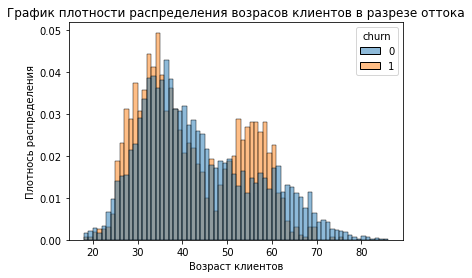

In [121]:
graph1 = sns.histplot(data, x='age', hue='churn', stat='density', common_norm=False, binwidth=1)
graph1.set(xlabel='Возраст клиентов', ylabel='Плотнось распределения', title='График плотности распределения возрасов клиентов в разрезе оттока');

Наиболее отточные интервалы по возрасту: примерно с 53 до 62

#### График отточности по баллам кредитного скоринга

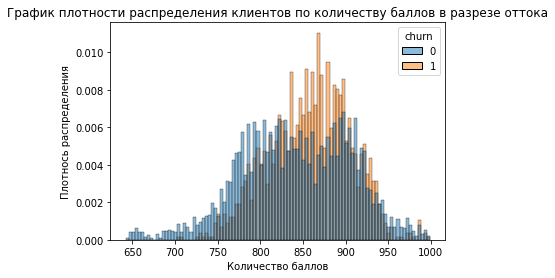

In [122]:
graph2 = sns.histplot(data, x='score', hue='churn', stat='density', common_norm=False, bins=100)
graph2.set(xlabel='Количество баллов', ylabel='Плотнось распределения', title='График плотности распределения клиентов по количеству баллов в разрезе оттока');

Отточные интервалы по баллам кредитного скоринга: с 850 до 900

#### График отточности по зарплате клиентов

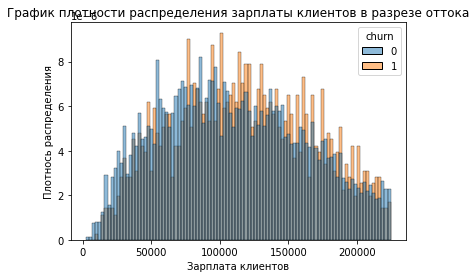

In [123]:
graph3 = sns.histplot(data, x='est_salary', hue='churn', stat='density', common_norm=False, bins=100)
graph3.set(xlabel='Зарплата клиентов', ylabel='Плотнось распределения', title='График плотности распределения зарплаты клиентов в разрезе оттока');

#### График отточности по балансу клиентов

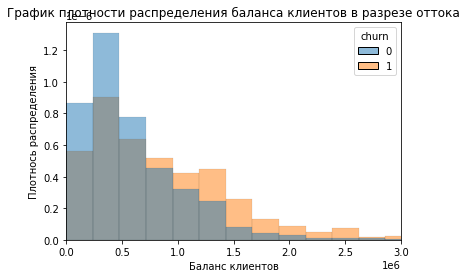

In [124]:
graph4 = sns.histplot(data, x='balance', hue='churn', stat='density', common_norm=False, bins=500)
graph4.set(xlabel='Баланс клиентов', ylabel='Плотнось распределения', title='График плотности распределения баланса клиентов в разрезе оттока')
plt.xlim([0, 3000000]);

Отточный интервал начинается после прохождения отметки по оси х в 1,5 млн

#### График отточности по количеству собственности

In [125]:
e_vsego = data['equity'].count()

equity_ottok = data.query('churn == 1')
e_ottok = equity_ottok['equity'].count()

e_u = round(e_ottok / e_vsego, 2)

print('Средний отток по количеству собственности:', e_u)

Средний отток по количеству собственности: 0.18


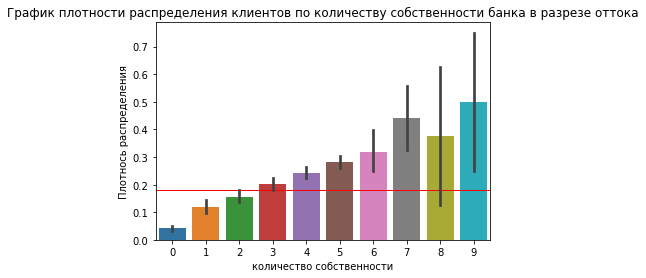

In [126]:
graph5 = sns.barplot(data=data, x='equity', y='churn')
graph5.set(xlabel='количество собственности', ylabel='Плотнось распределения', title='График плотности распределения клиентов по количеству собственности банка в разрезе оттока')

plt.axhline(y=e_u, linewidth='1', color='red', zorder=1);

Отточные интервалы по количеству собственности: с 4 до 7

#### График отточности по количеству продукции

In [127]:
p_vsego = data['products'].count()

products_ottok = data.query('churn == 1')
p_ottok = products_ottok['products'].count()

p_u = round(p_ottok / p_vsego, 2)

print('Средний отток по количеству продукции:', p_u)

Средний отток по количеству продукции: 0.18


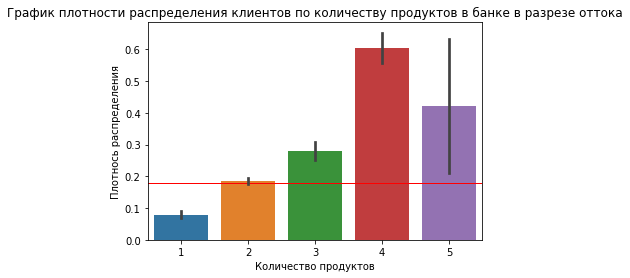

In [128]:
graph6 = sns.barplot(data=data, x='products', y='churn')
graph6.set(xlabel='Количество продуктов', ylabel='Плотнось распределения', title='График плотности распределения клиентов по количеству продуктов в банке в разрезе оттока')

plt.axhline(y=p_u, linewidth='1', color='red', zorder=1);

Отточные интервалы по количеству продукции: от 3 до 5

#### График отточности по полу

In [129]:
g_vsego = data['gender'].count()

gender_ottok = data.query('churn == 1')
g_ottok = gender_ottok['gender'].count()

g_u = round(g_ottok / g_vsego, 2)

print('Средний отток по полу:', g_u)

Средний отток по полу: 0.18


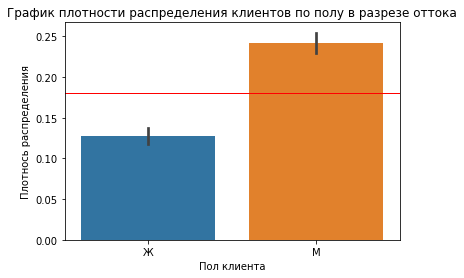

In [130]:
graph7 = sns.barplot(data=data, x='gender', y='churn')
graph7.set(xlabel='Пол клиента', ylabel='Плотнось распределения', title='График плотности распределения клиентов по полу в разрезе оттока')

plt.axhline(y=g_u, linewidth='1', color='red', zorder=1);

#### График отточности по наличию кредитной карты

In [131]:
c_vsego = data['credit_card'].count()

credit_ottok = data.query('churn == 1')
c_ottok = credit_ottok['credit_card'].count()

c_u = round(c_ottok / c_vsego, 2)

print('Средний отток по наличию кредитной карты:', c_u)

Средний отток по наличию кредитной карты: 0.18


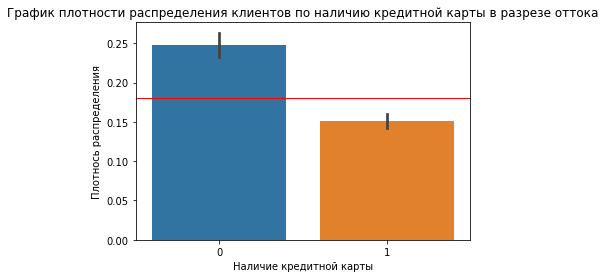

In [132]:
graph8 = sns.barplot(data=data, x='credit_card', y='churn')
graph8.set(xlabel='Наличие кредитной карты', ylabel='Плотнось распределения', title='График плотности распределения клиентов по наличию кредитной карты в разрезе оттока')

plt.axhline(y=g_u, linewidth='1', color='red', zorder=1);

#### График отточности по активности

In [133]:
a_vsego = data['last_activity'].count()

activ_ottok = data.query('churn == 1')
a_ottok = activ_ottok['last_activity'].count()

a_u = round(a_ottok / a_vsego, 2)

print('Средний отток по активности:', a_u)

Средний отток по активности: 0.18


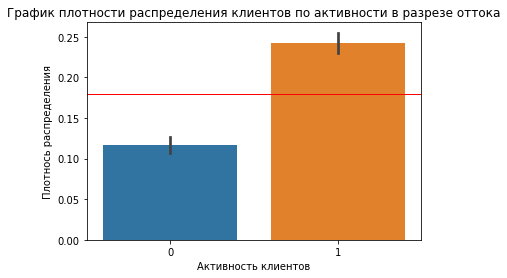

In [134]:
graph9 = sns.barplot(data=data, x='last_activity', y='churn')
graph9.set(xlabel='Активность клиентов', ylabel='Плотнось распределения', title='График плотности распределения клиентов по активности в разрезе оттока')

plt.axhline(y=g_u, linewidth='1', color='red', zorder=1);

### Общая таблица данных оттока/не оттока клиентов

In [135]:
# Посчитаем данные о ср. зарплате
new_data_sal = data.pivot_table(index=['churn'], values=['est_salary'], aggfunc=['mean']).reset_index()
new_data_sal.columns = ['отток', 'ср. зарплата']
new_data_sal.drop('отток', axis=1, inplace=True)
salary = new_data_sal.T
salary.columns = ['Не отток', 'Отток']
salary.reset_index(inplace= True)

In [136]:
# Посчитаем данные о ср. возрасте
new_data_age = data.pivot_table(index=['churn'], values=['age'], aggfunc=['mean']).reset_index()
new_data_age.columns = ['отток', 'ср. возраст']
new_data_age.drop('отток', axis=1, inplace=True)
age = new_data_age.T
age.columns = ['Не отток', 'Отток']
age.reset_index(inplace= True)

In [137]:
# Посчитаем данные о ср. балле кредит. скор.
new_data_score = data.pivot_table(index=['churn'], values=['score'], aggfunc=['mean']).reset_index()
new_data_score.columns = ['отток', 'ср. балл']
new_data_score.drop('отток', axis=1, inplace=True)
score = new_data_score.T
score.columns = ['Не отток', 'Отток']
score.reset_index(inplace= True)

In [138]:
# Посчитаем данные о ср. балансе
new_data_bal = data.pivot_table(index=['churn'], values=['balance'], aggfunc=['mean']).reset_index()
new_data_bal.columns = ['отток', 'ср. баланс']
new_data_bal.drop('отток', axis=1, inplace=True)
balance = new_data_bal.T
balance.columns = ['Не отток', 'Отток']
balance.reset_index(inplace= True)

In [139]:
# Посчитаем медианное количество продуктов
new_data_prod = data.pivot_table(index=['churn'], values=['products'], aggfunc=['median']).reset_index()
new_data_prod.columns = ['отток', 'мед. кол-во продуктов']
new_data_prod.drop('отток', axis=1, inplace=True)
products = new_data_prod.T
products.columns = ['Не отток', 'Отток']
products.reset_index(inplace= True)

In [140]:
# Посчитаем медианное количество объектов в собственности
new_data_equ = data.pivot_table(index=['churn'], values=['equity'], aggfunc=['median']).reset_index()
new_data_equ.columns = ['отток', 'мед. кол-во собственности']
new_data_equ.drop('отток', axis=1, inplace=True)
equity = new_data_equ.T
equity.columns = ['Не отток', 'Отток']
equity.reset_index(inplace= True)

In [141]:
frames = [salary, age, score, balance, products, equity]
result = pd.concat(frames)
result['Разница'] = (result['Отток'] / result['Не отток']) / result['Не отток']
result

,index,Не отток,Отток,Разница
0,ср. зарплата,109965.437155,117109.684309,0.000010
0,ср. возраст,43.148459,41.539087,0.022311
0,ср. балл,842.044538,858.625391,0.001211
0,ср. баланс,634836.056665,923867.325853,0.000002
0,мед. кол-во продуктов,2.000000,2.000000,0.500000
0,мед. кол-во собственности,3.000000,4.000000,0.444444


In [143]:
# Посчитаем моду по городу
a = 'мода по городу'
city_1 = data.query('churn == 1')
x = list(city_1['city'].mode())
city_0 = data.query('churn == 0')
y = list(city_0['city'].mode())

result.loc[len(result.index)] = [a, y[0], x[0], '-']

In [144]:
# Посчитаем моду по полу
b = 'мода по полу'
pol_1 = data.query('churn == 1')
z = list(pol_1['gender'].mode())
pol_0 = data.query('churn == 0')
l = list(pol_0['gender'].mode())

result.loc[len(result.index)] = [b, l[0], z[0], '-']

In [145]:
# Посчитаем моду по наличию кредитной карты
e = 'мода по карте'
card_1 = data.query('churn == 1')
f = list(card_1['credit_card'].mode())
card_0 = data.query('churn == 0')
g = list(card_0['credit_card'].mode())

result.loc[len(result.index)] = [e, g[0], f[0], '-']

In [146]:
# Посчитаем моду по активности
n = 'мода по активности'
act_1 = data.query('churn == 1')
o = list(act_1['last_activity'].mode())
act_0 = data.query('churn == 0')
p = list(act_0['last_activity'].mode())

result.loc[len(result.index)] = [n, p[0], o[0], '-']

In [147]:
result

,index,Не отток,Отток,Разница
0,ср. зарплата,109965.437155,117109.684309,0.00001
0,ср. возраст,43.148459,41.539087,0.022311
0,ср. балл,842.044538,858.625391,0.001211
0,ср. баланс,634836.056665,923867.325853,0.000002
0,мед. кол-во продуктов,2.0,2.0,0.5
0,мед. кол-во собственности,3.0,4.0,0.444444
6,мода по городу,Ярославль,Ярославль,-
7,мода по городу,Ярославль,Ярославль,-
8,мода по полу,Ж,М,-
9,мода по карте,1,1,-


### Корреляция

In [148]:
data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [149]:
one_hot = pd.get_dummies(data['city'])
data_2 = data.join(one_hot)
data_2 = data_2.drop('city', axis = 1)

In [150]:
one_hot_2 = pd.get_dummies(data_2['gender'])
data_3 = data_2.join(one_hot_2)
data_3 = data_3.drop('gender', axis = 1)
data_3.head()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,False,True,False,True,False
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,False,True,False,True,False
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,False,True,False,True,False
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,False,False,True,True,False
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,False,False,True,False,True


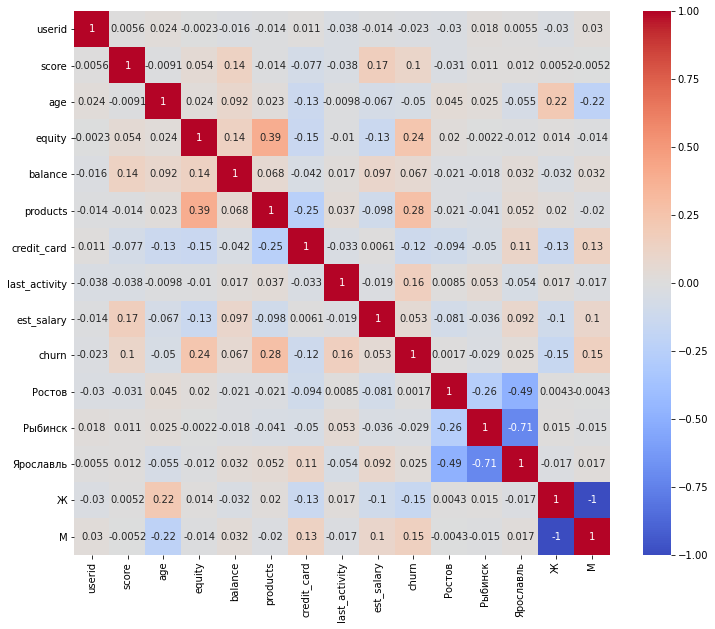

In [151]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_3.corr(), center=0, cmap='coolwarm', annot=True);

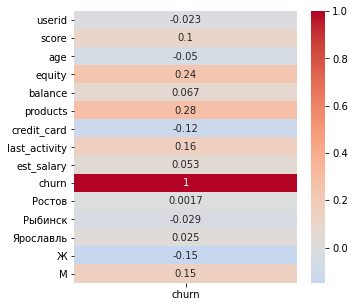

In [157]:
corr = data_3.corr()

x = corr[['churn']]
plt.figure(figsize=(5, 5))
sns.heatmap(x, center=0, cmap='coolwarm', annot=True);

В результате получены следующие значения корреляций:
1) Обратная связь уровня оттока наблюдается с распределением возрастов и наличием кредитной карты;
2) Со всеми остальными признаками уровень оттока коррелирует слабо в пределах от 0.067 до 0.27;
3) Уровень оттока наиболее взаимосвязан с количеством продуктов, которыми пользуется клиент (0.27), с количеством собственности (0.24), и с активностью клиентов (0.16), несмотря на то, что эти связи слабые.

# Шаг 4. Статистический анализ данных

Для проверки гипотез я буду использовать t-test, так как по центральной предельной теореме в выборке достаточно наблюдений, выборочное среднее распределено нормально вокруг среднего генеральной совокупности. То есть генеральная совокупность может быть распределена как угодно: датасет из средних значений выборок будет нормально распределён вокруг среднего всей совокупности.

Параметр equal_var и дисперсии в t-test'е: Так как наши выборки для сравнения различаются более чем на 1:4, equal_var принимает значение False в любом случае.

## Гипотезы

### H0: Средняя зарплата отточных клиентов равна средней зарплате не отточных, H1: Средняя зарплата отточных клиентов не равна средней зарплате не отточных

In [71]:
x = data.query('churn == 1')['est_salary']
y = data.query('churn == 0')['est_salary']

alpha = 0.05

results = st.ttest_ind(x, y, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.625739187700535e-07
Отвергаем нулевую гипотезу


### Гипотеза: H0 - количество собственности отточных клиентов равно не отточных, H1 - между количеством собственности в группах есть значимая разница.

In [72]:
b = data.query('churn == 1')['equity']
c = data.query('churn == 0')['equity']

alpha = 0.05

results = st.ttest_ind(b, c, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.0474815541594585e-131
Отвергаем нулевую гипотезу


### Промежуточные выводы

Перечислю признаки, которые лягут в в основу сегментации: 
1. Первый сегмент будет состоять из клиентов мужского пола, которые старше 50 лет. По построенным графикам видно, что наиболее склонные к уходу клиенты - мужчины, по графику возрастов видно, что много отточных клиентов в возрасте от 50 лет.
2. Второй сегмент содержит вырезку о клиентах мужского пола, у которых имеется кредитная карта, и хороший кредитный рейтинг. По графику отточности клиентов по наличию кредитной карты видно, что у большинства таких клиентов имеется кредитная карта.
3. Третий сегмент содержит срез данных об активности клиентов с количеством продуктов > 2.

### Сегментация клиентов

#### Сегмент 1: Признаки: клиенты мужского пола от 53 до 62 лет

In [73]:
segment_one = data.query('gender == "М" and (age >= 53 and age <= 62)')
segment_one.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
17,214277,793.0,Ярославль,М,53.0,3,627034.50,2,1,0,183430.19,0
36,199614,822.0,Ярославль,М,60.0,5,1472483.77,1,1,1,89132.67,0
41,206939,814.0,Рыбинск,М,56.0,2,1067536.40,2,1,0,95563.19,0


##### Уровень оттока клиентов мужского пола от 53 до 62 лет

In [74]:
ottok = segment_one.query('churn == 1')['userid'].count()
print('Количество отточных клиентов мужского пола:', ottok)
neottok = segment_one['userid'].count()
print('Общее количество клиентов мужского пола старше 50 лет:', neottok)
print('Уровень оттока клиентов мужского пола старше 50 лет внутри сегмента:', round(ottok/neottok*100, 2),'%')

Количество отточных клиентов мужского пола: 192
Общее количество клиентов мужского пола старше 50 лет: 561
Уровень оттока клиентов мужского пола старше 50 лет внутри сегмента: 34.22 %


#### Сегмент 2: Признаки: Клиенты мужского пола с наличием кредитной карты и кредитным рейтингом от 850 до 900

In [75]:
segment_two = data.query('gender == "М" and (score >= 850 and score <= 900) and credit_card == 1')
segment_two.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
22,161656,871.0,Ярославль,М,51.0,4,708866.92,1,1,0,106407.26,0
29,210799,868.0,Ярославль,М,43.0,3,532311.98,1,1,0,144073.00,0
50,116799,893.0,Ярославль,М,48.0,1,390504.59,2,1,0,85770.48,0
56,188364,860.0,Ярославль,М,55.0,6,865702.41,2,1,0,76058.00,0


##### Уровень оттока клиентов мужского пола с наличием кредитной карты и кредитным рейтингом от 850 до 900

In [76]:
ottok_two = segment_two.query('churn == 1')['userid'].count()
print('Количество отточных клиентов:', ottok_two)
neottok_two = segment_two['userid'].count()
print('Общее количество клиентов:', neottok_two)
print('Уровень оттока клиентов внутри сегмента:', round(ottok_two/neottok_two*100, 2),'%')

Количество отточных клиентов: 220
Общее количество клиентов: 802
Уровень оттока клиентов внутри сегмента: 27.43 %


#### Сегмент 3: Признаки: Активные клиенты с количеством продуктов от 3 до 5

In [77]:
segment_three = data.query('last_activity == 1 and (products >= 3 and products <= 5)')
segment_three.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
26,174396,898.0,Ярославль,Ж,62.0,3,364049.27,3,0,1,50661.84,0
33,125478,786.0,Ростов,Ж,27.0,3,448062.52,3,1,1,37607.67,0
72,156677,873.0,Ярославль,М,39.0,5,915959.85,3,0,1,154034.62,1
76,213688,922.0,Ярославль,Ж,37.0,5,1214707.38,4,0,1,85121.07,0


##### Уровень оттока клиентов

In [78]:
ottok_three = segment_three.query('churn == 1')['userid'].count()
print('Количество отточных клиентов:', ottok_three)
neottok_three = segment_three['userid'].count()
print('Общее количество клиентов:', neottok_three)
print('Уровень оттока клиентов внутри сегмента:', round(ottok_three/neottok_three*100, 2),'%')

Количество отточных клиентов: 333
Общее количество клиентов: 737
Уровень оттока клиентов внутри сегмента: 45.18 %


#### Сегмент 4: Признаки: клиенты с количеством собственности от 4 до 7 и количеством продуктов от 3 до 5

In [79]:
segment_four = data.query('(equity >= 4 and equity <= 7) and (products >= 3 and products <= 5)')
segment_four.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
72,156677,873.0,Ярославль,М,39.0,5,915959.85,3,0,1,154034.62,1
76,213688,922.0,Ярославль,Ж,37.0,5,1214707.38,4,0,1,85121.07,0
81,223978,850.0,Рыбинск,М,34.0,5,351583.16,4,0,1,115354.97,1


In [80]:
ottok_four = segment_four.query('churn == 1')['userid'].count()
print('Количество отточных клиентов:', ottok_four)
neottok_four = segment_four['userid'].count()
print('Общее количество клиентов:', neottok_four)
print('Уровень оттока клиентов внутри сегмента:', round(ottok_four/neottok_four*100, 2),'%')

Количество отточных клиентов: 356
Общее количество клиентов: 833
Уровень оттока клиентов внутри сегмента: 42.74 %


Наиболее приоритетный сегмент - сегмент с активными клиентами с количеством продуктов в банке от 3 до 5 (45,18%). Далее, сегмент с  банками с количеством собственности от 4 до 7 и количеством продуктов от 3 до 5 (42,74%), третий сегмент с клиентами мужского пола от 53 до 62 лет (34,22%), четвертый - с клиентами мужского пола с наличием кредитной карты и кредитным рейтингом от 850 до 900 (27,43%).

1) Возможно, что отток клиентов мужского пола пожилого возраста происходит из-за возраста клиента. Например, клиент начал пользоваться банком, что бы получить кредиту карту, после этого происходит отток, так как клиент в силу возраста и облегчения процесса перешёл на пользование мобильным приложением банка. Рекомендации постройка банков или банкоматов около большого скопления пожилых людей, например около магазинов. 

2) Среди клиентов мужского пола с хорошим кредитным рейтингом тоже высокий отток. Возможно, это связано с закрытием кредита, после которого клиент уже не нуждается в услугах банка. Рекомендации: привлечение клиента возможностью кэшбека, различными скидками, как например "сбер спасибо".

3) Среди активных клиентов с использованием большого количества продуктов в банке аналогично высокий отток, возможное решение - увеличение количества используемых продуктов.

4) Там где много баллов собственности и большое количество продуктов тоже весомый отток. Рекомендации: увеличение количества используемых продуктов и переманивание клиентов с более высокой собственностью.

## Шаг 5. Подведение итогов

### В ходе выполнения проекта исследовали уходящих и постоянных клиентов, составили портреты клиентов. Также были построены визуализации сравниваемых параметров, сформулировали несколько гипотез, а затем проверили их.